# PRACTICA 5 - CONVOLUCIÓN

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plti

from matplotlib import cm #Para graficar los kernels
from scipy.signal import convolve2d #Función para hacer la convolución

%matplotlib inline

In [151]:
M_YIQ = np.array([[0.299, 0.587, 0.114],
                  [0.595716, -0.274453, -0.321263],
                  [0.211456, -0.522591, 0.311135]])

M_RGB = np.array([[1, 0.9563, 0.6210],
                  [1, -0.2721, -0.6474],
                  [1, -1.1070, 1.7046]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, M_YIQ)

def yiq2rgb(img):
    return apply_matrix(img, M_RGB)
 
def rmse(img1, img2):
    return np.sqrt(np.mean((img1-img2)**2))


import scipy.stats as st

#-----------------------------------------------------------------------------------------------------------

def gaussian(N, sigma=1):
    x = np.linspace(-sigma, sigma, N+1) #linspace crea un vector de valores entre -sigma y sigma igualmente distribuidos
    gaussian_dist = np.diff(st.norm.cdf(x)) #CDF = Cumulative distribution function NORM: distribucion normal/gaussiana.
    gaussian_filter = np.outer(gaussian_dist, gaussian_dist)
    return gaussian_filter/gaussian_filter.sum()

#-----------------------------------------------------------------------------------------------------------

def box (n):   
    return 1/(n*n)*np.ones((n,n))

#-----------------------------------------------------------------------------------------------------------

def circle(n):
    cir=box(n)
    cir[0][0]=0
    cir[0][n-1]=0
    cir[n-1][0]=0
    cir[n-1][n-1]=0 
    if n>5:
        cir[0][1]=0
        cir[1][0]=0
        cir[n-1][n-2]=0 
        cir[n-2][n-1]=0 
        cir[0][n-2]=0 
        cir[1][n-1]=0 
        cir[n-2][0]=0 
        cir[n-1][1]=0
    return  cir

#-----------------------------------------------------------------------------------------------------------

def bartlett(n):
    bart=np.array([[1, 1, 1, 1, 1 ],
                  [ 1, 2, 2, 2, 1 ],
                  [ 1, 2, 3, 2, 1 ],
                  [ 1, 2, 2, 2, 1 ],
                  [ 1, 1, 1, 1, 1]])   
    bart = bart / bart.sum()
    return  bart

#-----------------------------------------------------------------------------------------------------------

def Laplace(n):
    if (n==4):
        lp=np.array([[0,-1,0],[-1,4,-1,],[0,-1,0]])
    elif (n==8):
        lp=np.array([[-1,-1,-1],[-1,8,-1,],[-1,-1,-1]])
    return lp 

#-----------------------------------------------------------------------------------------------------------

def high_pass(kernel):
     kernel = -kernel
     kernel[kernel.shape[0]//2][kernel.shape[1]//2] += 1
     return kernel

#-----------------------------------------------------------------------------------------------------------
    
def dog(size,sigma1,sigma2):
    gauss1=np.zeros((size,size))
    gauss2=np.zeros((size,size))
    m=size//2
    n=size//2
    for x in range(-m,m+1):
        for y in range(-n,n+1):
            #fino
            x1=sigma1*np.sqrt((2*np.pi))
            x2=np.exp(-(x**2+ y**2)/(2*sigma1**2))
            gauss1[x+m][y+n] = (1/x1)*x2
            #grueso
            x11=sigma2*np.sqrt((2*np.pi))
            x22=np.exp(-(x**2+ y**2)/(2*sigma2**2))
            gauss2[x+m][y+n] = (1/x11)*x22           
    return gauss2-gauss1

#-----------------------------------------------------------------------------------------------------------

SyntaxError: invalid syntax (3268106652.py, line 29)

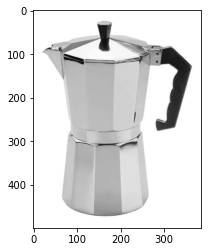

In [3]:
img = imageio.imread("cafe.png")[:,:,0]/255
plt.imshow(img, 'gray')

In [4]:
from matplotlib import cm

#Para dibujar el Kernel en 3D.
def plot_kernel(data, ax=None):
    rows, cols = data.shape
    y, x = np.meshgrid(np.arange(rows),np.arange(cols),indexing='ij')
    if ax == None:
        fig = plt.figure()
        ax = fig.gca(projection='3d')
    _min, _max = (np.min(data), np.max(data))
    ax.plot_surface(x, y, data.T, cmap=cm.jet, vmin=_min, vmax=_max)

#Para graficar imagen, imagen filtrada y kernel en un solo grafico.
def plot_images_and_kernel(img, img_filt, kernel):
    fig = plt.figure(figsize=(17,5))
    ax1 = fig.add_subplot(131)
    ax1.imshow(img, 'gray')
    ax1.title.set_text('Input image')
    ax2 = fig.add_subplot(132)
    ax2.imshow(img_filt, 'gray')
    ax2.title.set_text('Filtered image')
    ax3 = fig.add_subplot(133, projection='3d')
    plot_kernel(kernel, ax=ax3)
    ax3.title.set_text('Kernel')
    plt.show()

[[0.09533172 0.11809491 0.09533172]
 [0.11809491 0.14629346 0.11809491]
 [0.09533172 0.11809491 0.09533172]]


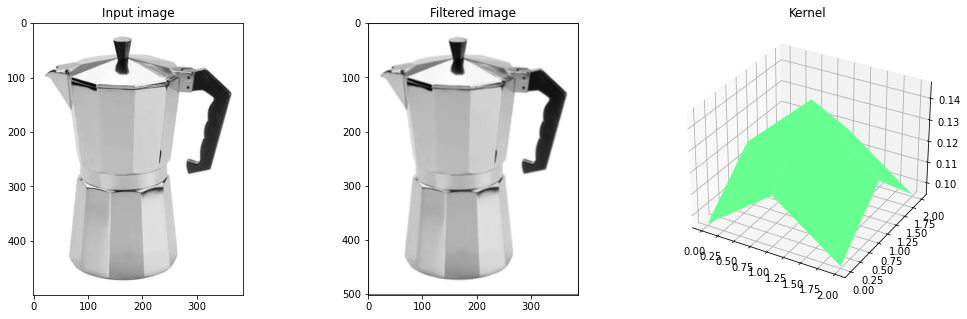

In [5]:
# Ejemplo del kernel identidad
kernel = gaussian(3)

#
#kernel = kernel / kernel.sum()

print(kernel)

img_filt = convolve2d(img, kernel, mode='full')
plot_images_and_kernel(img, img_filt, kernel)

[[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]]


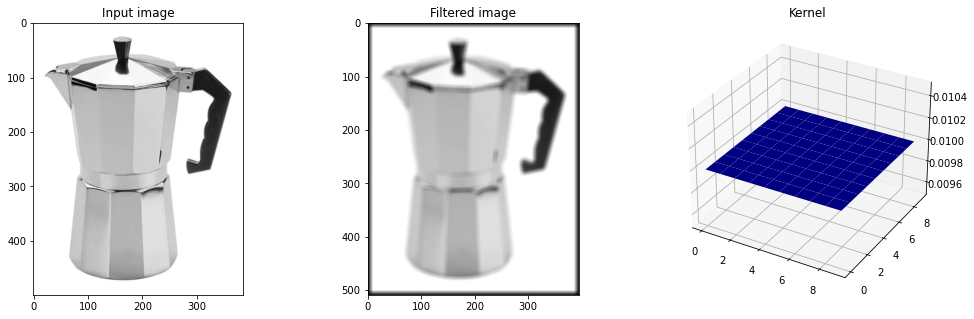

In [150]:
#Filtros PasaBajos
N = 10
kernel = box (N)
#kernel = circle(N)
#kernel = bartlett(1)
#kernel = gaussian(8)

#kernel = kernel / kernel.sum()

print(kernel)

img_filt = convolve2d(img, kernel, mode='full')
plot_images_and_kernel(img, img_filt, kernel)

[[-0.02867168 -0.03633314 -0.0393175  -0.03633314 -0.02867168]
 [-0.03633314 -0.04604185 -0.04982366 -0.04604185 -0.03633314]
 [-0.0393175  -0.04982366  0.9460839  -0.04982366 -0.0393175 ]
 [-0.03633314 -0.04604185 -0.04982366 -0.04604185 -0.03633314]
 [-0.02867168 -0.03633314 -0.0393175  -0.03633314 -0.02867168]]


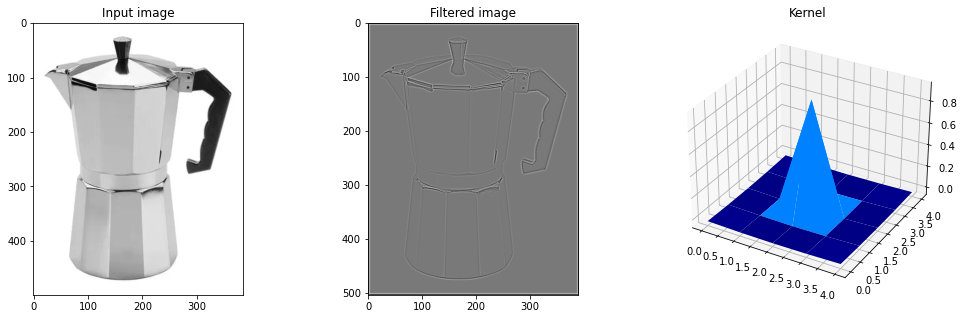

In [44]:
#Pasaaltos a partir de un pasabajos: PA = Id - PB
#ker = np.array([[0,1,0],
#                   [1,2,1],
#                   [0,1,0]])

N = 5
ker = gaussian(N)

kernel = high_pass(ker)

#kernel = kernel / kernel.sum()

print(kernel)

img_filt = convolve2d(img, kernel, mode='full')
plot_images_and_kernel(img, img_filt, kernel)

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


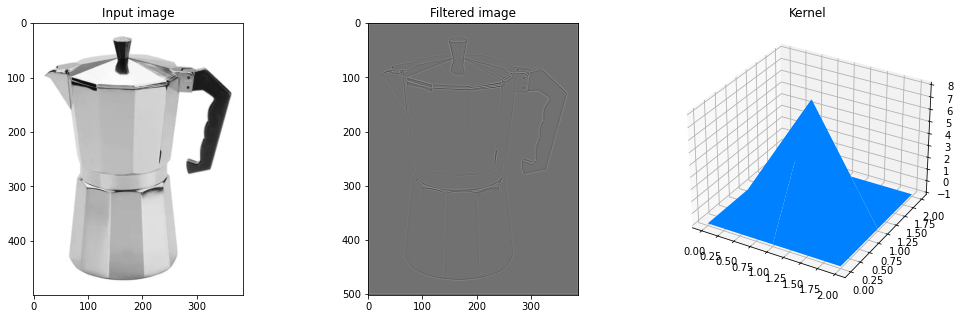

In [49]:
#Filtro Pasa Altos 4 u 8 vecinos laplace
N = 8

kernel = Laplace(N)

print(kernel)

img_filt = convolve2d(img, kernel, mode='full')
plot_images_and_kernel(img, img_filt, kernel)

[[ 0.03919266  0.01941494  0.00653657  0.01941494  0.03919266]
 [ 0.01941494 -0.03454684 -0.06565728 -0.03454684  0.01941494]
 [ 0.00653657 -0.06565728 -0.10638461 -0.06565728  0.00653657]
 [ 0.01941494 -0.03454684 -0.06565728 -0.03454684  0.01941494]
 [ 0.03919266  0.01941494  0.00653657  0.01941494  0.03919266]]


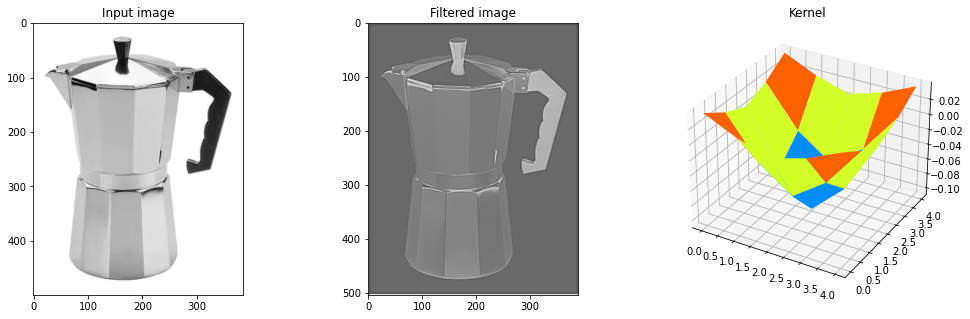

In [55]:
#Filtro PasaBanda DoG diferencia de gauseanas
N = 5
G1 = 1.5
G2 = 2.5

kernel = dog(N,G1,G2)

print(kernel)

img_filt = convolve2d(img, kernel, mode='full')
plot_images_and_kernel(img, img_filt, kernel)

[[-0.04820079 -0.0615726  -0.0615726  -0.04820079]
 [-0.0615726  -0.078654   -0.078654   -0.0615726 ]
 [-0.0615726  -0.078654    0.921346   -0.0615726 ]
 [-0.04820079 -0.0615726  -0.0615726  -0.04820079]]


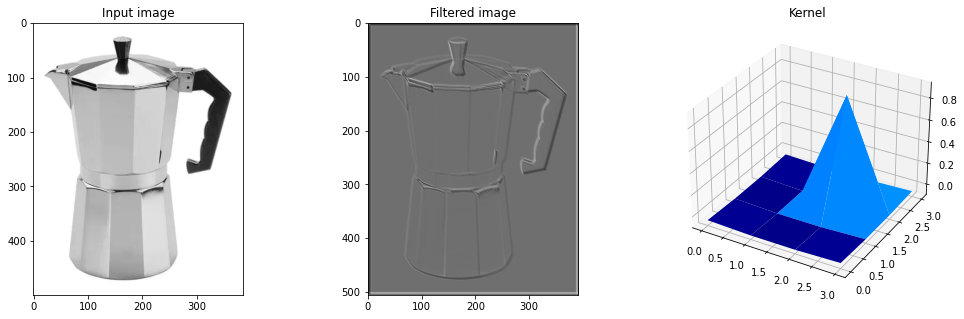

In [68]:
#Filtro PasaBanda DoG diferencia de gauseanas
N = 4

kernel = high_pass(gaussian(N)) 
ker    = np.identity(N)

print(kernel)

img_filt = convolve2d(img, ker, mode='full')
img_filt = convolve2d(img_filt, kernel, mode='full')

plot_images_and_kernel(img, img_filt, kernel)

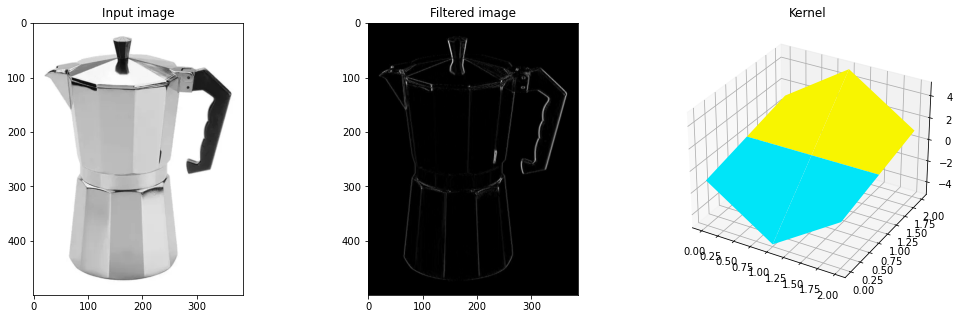

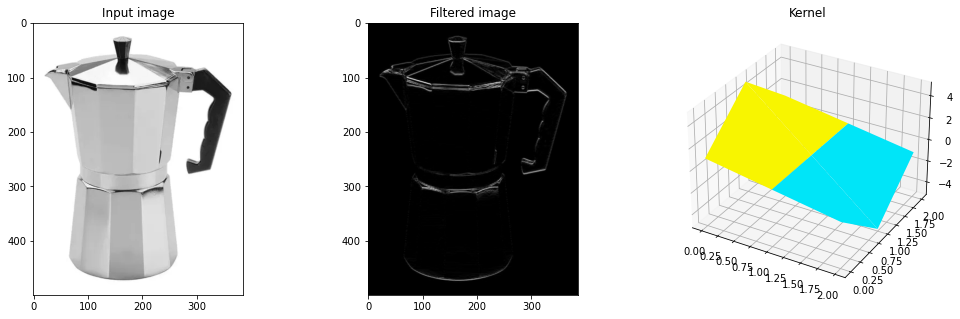

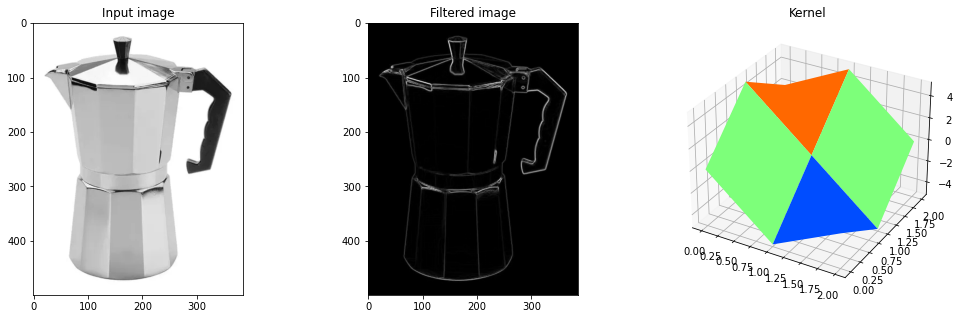

In [85]:
# Sobel 3x3 -> Calcular valor absoluto de gradientes Gx y Gy.

kernelX = np.array([[-1,0,1],
                    [-5,0,5],
                    [-1,0,1]])

kernelY = np.array([[1, 5, 1],
                   [ 0, 0, 0],
                   [-1,-5,-1]])

img_filt_X = convolve2d(img, kernelX, mode='same',boundary='symm')
img_filt_Y = convolve2d(img, kernelY, mode='same',boundary='symm')

absoluto = np.sqrt(img_filt_X*img_filt_X + img_filt_Y*img_filt_Y)

kernel = kernelX + kernelY

plot_images_and_kernel(img, abs(img_filt_X), kernelX)
plot_images_and_kernel(img, abs(img_filt_Y), kernelY)
plot_images_and_kernel(img, absoluto, kernel)

plti.imsave("espectro.png", abs(img_filt_X), cmap='gray')
plti.imsave("espectro2.png", abs(img_filt_Y), cmap='gray')
plti.imsave("espectro3.png", absoluto, cmap='gray')

0.0


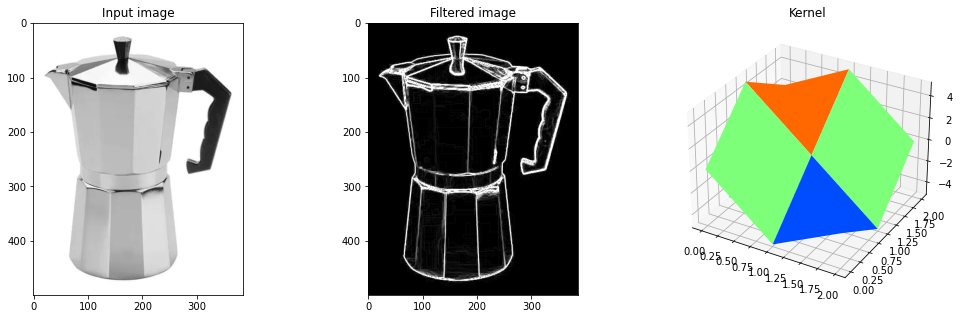

In [126]:
#Aplicar un umbral al módulo del filtro de Sobel para obtener una imagen binaria con 1s y 0s.

absoluto = np.clip(absoluto, 0 , 1)
          
plot_images_and_kernel(img, absoluto, kernel)
